# ОПРЕДЕЛЕНИЕ КРИТЕРИЕВ РАСПОЗНОВАНИЯ УСПЕШНОСТИ КОМПЬЮТЕРНЫХ ИГР

## ОГЛАВЛЕНИЕ

[1 Изучение общей информации](#1)<br>
[2 Подготовка данных](#2)<br>
[2.1 Приведение названий столбцов к нижнему регистру](#2.1)<br>
[2.2 Преобразование данных в нужные типы и обработка пропусков](#2.2)<br>
[2.3 Расчет суммарных продаж](#2.3)<br>
[3 Исследовательский анализ данных](#3)<br>
[3.1 Анализ количества изданных игр по годам](#3.1)<br>
[3.2 Анализ продаж по платформам](#3.2)<br>
[3.3 Определение актуального периода](#3.3)<br>
[3.4 Анализ диаграмм размаха для продаж в разрезе платформ](#3.4)<br>
[3.5 Анализ влияния отзывов критиков и пользователей на продажи видеоигр](#3.5)<br>
[3.6 Анализ распределения игр по жанрам](#3.6)<br>
[4 Описание портрета пользователя каждого региона](#4)<br>
[4.1 Определение самых популярных платформ в разрезе регионов](#4.1)<br>
[4.2 Определение самых популярных жанров в разрезе регионов](#4.2)<br>
[4.3 Определение влияния на продажи рейтинга ESRB в разрезе регионов](#4.3)<br>
[5 Проверка статистических гипотез](#5)<br>
[5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#5.1)<br>
[5.2 Средние пользовательские рейтинги жанров Action и Sports разные](#5.2)<br>
[6 Общий вывод](#final)

### Постановка задачи <a class="tocSkip">

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Предоставлены данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<a id='1'></a>
### 1 Изучение общей информации

In [1]:
import pandas as pd # импортируем библиотеку pandas
from IPython.display import display #импортируем метод дисплей для красивого вывода таблиц (не применяя print)
import matplotlib.pyplot as plt #импортируем библиотеку для работы с графиками
import seaborn as sns # подключаем графическую библиотеку seaborn
import plotly.express as px # подключаем графическую библиотеку plotly
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from scipy import stats as st # импортируем библиотеку для проведения статистического анализа
import math as mt # импортируем библиотеку с математическими функциями
import numpy as np # подключаем библиотеку для работы с большими массивами данных
pd.set_option('display.max_columns', None) #реализуем возможность вывода всех столбцов на экран

In [2]:
df = pd.read_csv('games.csv', sep=',')
display(df.head())
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


По итогу изучения общей информации замечено следующее:
1. Наименования столбцов начинаются с заглавных букв.
2. Для 2-х игр отсутствует название.
3. Для части игр нет даты выхода.
4. Год выхода в формате float.
5. Для 2-х игр не заполнен жанр.
6. Для половины игр отсутствует оценка критиков.
7. Для трети игр отсутствует оценка пользователей.
8. В столбце с оценками пользователей имеются строковые данные.
9. Рейтинг также есть только примерно для 2/3 игр, и также в данном столбце имеются строковые данные.

Перед более подробным изучением столбцов датасета приведем описание данных.

Описание данных

* *Name* — название игры
* *Platform* — платформа
* *Year_of_Release* — год выпуска
* *Genre* — жанр игры
* *NA_sales* — продажи в Северной Америке (миллионы проданных копий)
* *EU_sales* — продажи в Европе (миллионы проданных копий)
* *JP_sales* — продажи в Японии (миллионы проданных копий)
* *Other_sales* — продажи в других странах (миллионы проданных копий)
* *Critic_Score* — оценка критиков (максимум 100)
* *User_Score* — оценка пользователей (максимум 10)
* *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию

*Данные за 2016 год могут быть неполными.*

Посмотрим данные, содержащиеся в столбцах.

In [3]:
df.Name.value_counts()

Need for Speed: Most Wanted           12
Ratatouille                            9
FIFA 14                                9
Madden NFL 07                          9
LEGO Marvel Super Heroes               9
                                      ..
RalliSport Challenge(JP sales)         1
Pokemon Dash                           1
Killzone 3                             1
SBK09 Superbike World Championship     1
Ailu de Puzzle                         1
Name: Name, Length: 11559, dtype: int64

Видим, что часть игр повторяется. Посмотрим примеры.

In [4]:
df.query('Name == "Need for Speed: Most Wanted"')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Видим, что повторы в наименованиях игр могут быть обусловлены 2-мя причинами: игра вышла на нескольких платформах и игра переиздавалась.

Посмотрим что за 2 игры не обладают названием и жанром.

In [8]:
df[df['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Из представленных данных невозможно понять что это за игры, необходимо будет избавиться от них на этапе предобработки данных.

In [9]:
df.Platform.value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

Ощущается 2016 год в данных, - лидеры по платформам PS2 и Nintendo DS.

In [10]:
df.Year_of_Release.value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
Name: Year_of_Release, dtype: int64

Видим, что свежих игр даже по состоянию на 2016 год достаточно мало. Посмотрим примеры для строк, где в столбце Year_Of_Release отсутствуют значения.

In [12]:
df[df['Year_of_Release'].isna()].head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Данные по годам нельзя заполнять средними значениями, потому что это исказит анализ. Группировка по периоду одна из важных задач проекта, поэтому данные с пустыми годами должны быть отсеяны на этапе предобработки.

In [13]:
df.Genre.value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

С жанрами все в порядке, самые популярные - экшены, спортивные и некий жанр misc. Посмотрим что это за игры, вдруг это ошибка.

In [14]:
df.query('Genre == "Misc"').head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
14,Kinect Adventures!,X360,2010.0,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E
19,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,4.74,9.20,4.16,2.04,77.0,7.9,E
61,Just Dance 3,Wii,2011.0,Misc,5.95,3.11,0.00,1.06,74.0,7.8,E10+
68,Just Dance 2,Wii,2010.0,Misc,5.80,2.85,0.01,0.78,74.0,7.3,E10+


Видим, что игры под этим жанром совершенно разные, скорей всего misc - это сокращение от miscellaneous (разнообразный). И для нераспространенных жанров был проставлен именно этот тип.

Посмотрим описание столбцов типа float.

In [15]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Видим, что наилучшие продажи идут в Северной Америке, хуже в Европе и намного хуже в Японии и других странах. Пропусков данных по продажам нет, но имеется большое количество строк с нулевыми продажами. В процессе предобработки данных надо рассмотреть вероятность перевода милионов в тысячи и в тип int.
<br>Средний уровень критиков 69 баллов. Для половины игр отсутсвует оценка критиков, скорей всего эти игры не были столь популярны, чтобы привлечь внимание критиков. Заполнять чем-то средним или похожим в данном случае нельзя, т.к. это исказит анализ. Также в виду большого количества строк удаление этих даннных здесь также делать нельзя.

In [16]:
df.tail(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16700,Mezase!! Tsuri Master DS,DS,2009.0,Sports,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16701,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16702,STORM: Frontline Nation,PC,2011.0,Strategy,0.00,0.01,0.00,0.0,60.0,7.2,E10+
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.00,0.0,NaN,tbd,E
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN


Хвост был выведен для того, чтобы посмотреть разнообразность данных в столбце User_Score. Видим, что в столбце имеется большое количество пустых значений, что означает, что игра не оценивалась пользователями. Также имеется значение tbd - "To Be Determined", т.е. оценка должна была быть определена позже. Судя по датам, на ресурсе откуда бралась информация об оценках, эта информация так и не появилась. Это значение будет необходимо заменить на некоторое другое в процессе предобработки данных.

In [17]:
df['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

Получили рейтинги игр. Разберемся, что значит каждый из них. 
- «E» («Everyone») — «Для всех» - от 6 лет и старше;
- «T» («Teen») — «Подросткам» - от 13 лет;
- «M» («Mature») — «Для взрослых»;
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»;
- «EC» («Early childhood») — «Для детей младшего возраста» (в основном, развивающие игры) - от 3 лет;
- «RP» («Rating Pending») — «Рейтинг ожидается»;
- «K-A» ("Kids to Adults") - старое название рейтинга E;
- «AO» («Adults Only 18+») — «Только для взрослых».

Самыми массовыми являются первые 4 рейтинга.

### Вывод по изучению общей информации в данных<a class="tocSkip">

<div style="border:solid green 2px; padding: 10px">
<b>По итогу изучения информации в исходных данных можно выделить несколько основных задач для их предобработки и дальнейшего изучения:</b>
    
1. Необходимо привести наименования столбцов к нижнему регистру.
2.	Убрать из данных 2 игры без названий.
3.	Преобразовать год выхода в формат int.
4.	Преобразовать оценки пользователей из шкалы от 1 до 10 в шкалу от 1 до 100 (как у критиков).
5.	Отсеять строки с отсутствующей информацией по году выпуска.
6.	Обработать пропуски по оценкам пользователей и критиков.
7.	Обработать значение tbd в оценках пользователей.
8.	Рассмотреть возможность обработки пропусков в столбце рейтинга.
9.	 Рассмотреть возможность объединения или отброса строк с малочисленным рейтингом (EC, RP, K-A, AO).
</div>

<a id='2'></a>
### 2 Подготовка данных

<a id='2.1'></a>
#### 2.1 Приведение названий столбцов к нижнему регистру

In [18]:
df.columns = df.columns.str.lower() # приведем названия столбцов к нижнему регистру
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<a id='2.2'></a>
#### 2.2 Преобразование данных в нужные типы и обработка пропусков

Для начала исключим данные из датасета, где это можно сделать без существенных последствий, а именно: строки с пропусками в столбцах name и year_of_release.

In [19]:
df.dropna(subset=['name', 'year_of_release'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Разберемся с оценками пользователей и критиков.

In [20]:
df.query('user_score == "tbd"') # посмотрим строки с оценкой пользователей = tbd

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Во первых видим, что строк с значением tbd очень много (около 14 % от всего датасета), что говорит нам, что избавляться от них нельзя. Также видим, что несмотря на значение tbd в некоторых строках есть оценка критиков. Из данных фактов можно заключить, что ресурс с которого бралась информация для игр с отсутствующим рейтингом пользователей поставил значение "ожидается" с прицелом на то, что кто-то из пользователей все-таки оценит игру. Но на момент выгрузки датасета эти игры никто не оценил, поэтому для них отсутствует оценка пользователей. Заполнять их средними значениями или нулями нельзя, потому что это исказит анализ, наиболее правильным здесь будет заполнить пропусками вида NaN.

In [21]:
df['user_score'] = df['user_score'].where(df['user_score'] != 'tbd', )

In [22]:
df.query('user_score == "tbd"') # проверим, что таких пользователей не осталось

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [23]:
df.info() # выведем информацию по таблице

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [24]:
df['user_score'].unique() #проверим, что в столбце больше не осталось никаких других строковых данных

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Т.к. оценки критиков изменяются по шкале от 0 до 100, удобно будет привести оценки пользователей также в этот формат. Это позволит сравнивать оценки в одинаковой шкале данных и перевести оба столбца в целочисленный тип.

In [25]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [26]:
df['user_score'] = (df['user_score'].astype('float64')) * 10 # перевод в числовой формат и умножение на 10

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Перевод типов закончен, произведем обработку столбца *rating*. Как мы видели выше, у нас имеются следующие значения данного столбца:

- «E» («Everyone») — «Для всех» - от 6 лет и старше;
- «T» («Teen») — «Подросткам» - от 13 лет;
- «M» («Mature») — «Для взрослых»;
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»;
- «EC» («Early childhood») — «Для детей младшего возраста» (в основном, развивающие игры) - от 3 лет;
- «RP» («Rating Pending») — «Рейтинг ожидается»;
- «K-A» ("Kids to Adults") - старое название рейтинга E;
- «AO» («Adults Only 18+») — «Только для взрослых».
- Значения NaN

Первые 4 рейтинга являются самыми массовыми. Рейтинг K-A является старым названием рейтинга E, поэтому может быть объединен с  ним. Рейтинг AO также не сильно отличается от рейтинга M, поэтому может быть объединен с ним. Значения NaN можно отнести к рейтингу RP, т.к. он говорит о неопределенном возрастном ограничении. Также данные сокращения рейтингов достаточно неудобны для восприятия, поэтому лучше их перевести в форматы: 3+, 6+, 10+, 13+, 18+ и "не определен". Получится следующее соответствие:

- E (включая K-A) == 6+
- T == 13+
- M (включая AO) == 18+
- E10+ == 10+
- EC == 3+
- RP (включая NaN) == не определен

Для сохранения исходных данных добавим эти рейтинги в новый столбец.

In [28]:
d = {'E': '6+', 'T': '13+', 'K-A': '6+', 'M': '18+', 'AO': '18+', 
     'E10+': '10+', 'EC': '3+', 'RP': 'не определен'} # создаем словарь соответствия
df['rating'] = df['rating'].fillna('RP') # заполняем пропуски значением RP
df['age_rating'] = df['rating'].map(d) # создаем новый столбец с соответствующими возрастными ограничениями
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  age_rating       16444 non-null  object 
dtypes: float64(7), object(5)
memory usage: 1.6+ MB


None

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,age_rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,6+
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,не определен
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,6+
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,6+
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,не определен


Исходные данные обработаны. Т.к. ранее мы проводили удаление данных, перед пользованием данными проведем сброс индексов.

In [29]:
df= df.reset_index(drop=True)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,age_rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,6+
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,не определен
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,6+
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,6+
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,не определен


In [30]:
df.duplicated().sum() # проверим на дубликаты

0

<a id='2.3'></a>
#### 2.3 Расчет суммарных продаж

In [31]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,age_rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,6+,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,не определен,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,6+,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,6+,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,не определен,31.38


Суммарные продажи успешно добавлены.

<a id='3'></a>
### 3 Исследовательский анализ данных

<a id='3.1'></a>
#### 3.1 Анализ количества изданных игр по годам

Выше мы видели, что по ряду причин одна и та же игра могла попасть в список несколько раз, поэтому создадим сводную табицу где каждой игре будет присвоен начальный год выхода. Причем в качестве начального принимается тот, где она вышла впервые. Далее произведем группировку по году выхода и посчитаем сколько всего игр выпускалось в разные годы.

In [32]:
games_per_year = (df.pivot_table(index='name', values = 'year_of_release', aggfunc = 'min')
       .reset_index()
       .pivot_table(index='year_of_release', values='name', aggfunc = 'count').reset_index())
games_per_year['year_of_release'] = games_per_year['year_of_release'].astype('int')
games_per_year

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,14
4,1984,13
5,1985,13
6,1986,21
7,1987,15
8,1988,14
9,1989,12


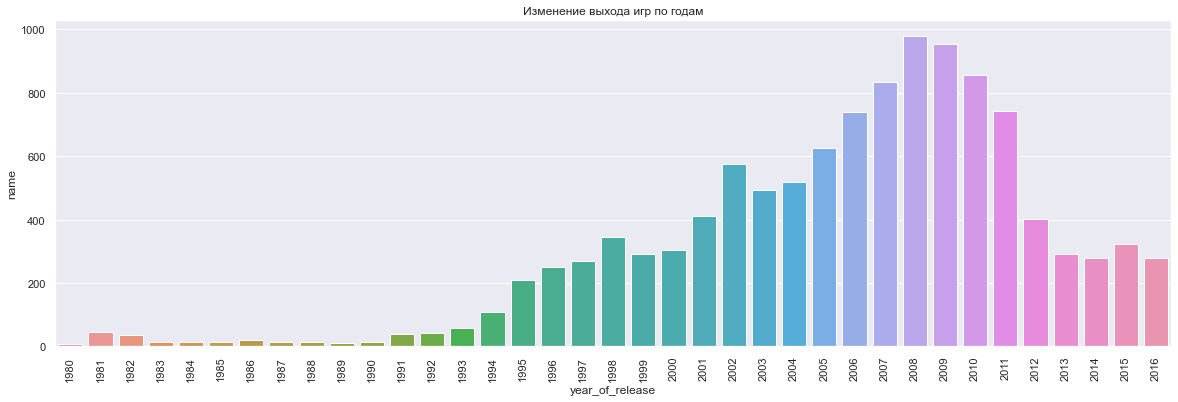

In [38]:
ax = sns.barplot(x="year_of_release", y="name", data=games_per_year)
plt.xticks(rotation=90)
ax.set_title('Изменение выхода игр по годам')
sns.set(rc={'figure.figsize':(20,6)})

Начиная с 1994 года стал происходить стремительный рост видеоигр, что обусловлено развитием технологий. Максимума количество вышедших игр за год достигает в 2008 году, далее происходит резкое снижение. Снижение может быть обсусловлено тем, что рынок компьютерных игр стал более коммерциализирован: чтобы успешно продавать игры, их качество нужно повышать, а на создание игры с лучшим качеством уходит больше времени. Также при увеличении качества растет и их стоимость, что приводит к снижению спроса на них. **Также видим, что основной рост видеоигр пошел с 2000 года, поэтому резонно далее рассматривать период, начиная с данного года.**

<a id='3.2'></a>
#### 3.2 Анализ продаж по платформам

Создадим сводную таблицу с платформами и изменением суммарных продаж по годам.

In [34]:
sales_per_year = (df.pivot_table(index='platform', columns = 'year_of_release', 
                                values='total_sales', aggfunc='sum', margins=True)
                  .reset_index().sort_values(by='All', ascending=False)) #сделали сводную по годам и сразу отсортировали по суммарным продажам
sales_per_year

year_of_release,platform,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,All
31,All,11.38,35.68,28.88,16.80,50.35,53.95,37.08,21.70,47.21,73.45,49.37,32.23,76.16,45.99,79.23,88.12,199.15,201.07,256.31,251.11,201.66,331.46,394.97,357.54,418.68,457.82,517.71,604.75,671.50,658.82,590.13,507.58,355.84,361.24,331.53,267.98,129.94,8814.37
16,PS2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.17,166.43,205.38,184.31,211.81,160.66,103.42,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN,1233.56
28,X360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.25,51.62,95.41,135.26,120.29,170.03,143.84,99.74,88.58,34.74,11.96,1.52,961.24
17,PS3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.96,73.19,118.52,130.93,142.17,156.78,107.36,113.25,47.76,16.82,3.60,931.34
26,Wii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.15,152.77,171.32,206.97,127.95,59.65,21.71,8.59,3.75,1.14,0.18,891.18
4,DS,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN,802.78
15,PS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.03,35.96,94.70,136.17,169.49,144.53,96.37,35.59,6.67,2.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,727.58
18,PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25,314.14
6,GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07,61.53,74.16,56.67,77.91,33.86,5.28,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312.88
19,PSP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.06,43.84,55.32,46.93,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,NaN,289.53


Данные по продажам получены по каждой платформе и в разрезе каждого года. Отобразим изменение продаж по платформам. Т.к. верхняя строчка - это суммарные продажи по всем платформам, то ее на графике отображать не будем.

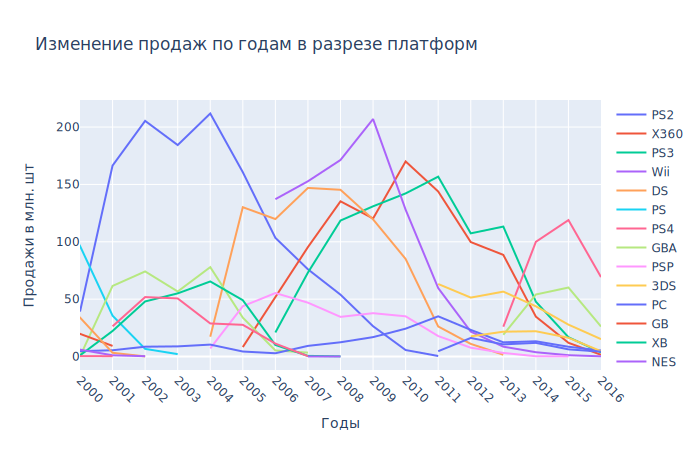

In [37]:
# выведем график по продажам по платформам с наибольшими суммарными продажами
years = sales_per_year.columns[1:len(sales_per_year.columns)-1] # определяем шкалу X

# здесь я заменил топ на вывод всех платформ
top = sales_per_year['platform'].count() # определяем, какое количество считать топом

fig = go.Figure() # создаем оболочку фигуры
# определим по какой столбец выводить данные на график, последний столбец Общий, поэтому его не учитываем
col_count = len(sales_per_year.columns) - 1 

for i in range(1, top): # цикл от 1 строки до конца топа, строка с общими данными не включена
    values = sales_per_year.iloc[i, 1:col_count] # значения для линии
    line_name = sales_per_year.iloc[i, 0]
    fig.add_trace(go.Scatter(x=years, y=values, name=line_name))

fig.update_layout(title='Изменение продаж по годам в разрезе платформ',
                   xaxis_title='Годы',
                   yaxis_title='Продажи в млн. шт',
                 xaxis = dict(tickmode = 'linear',tick0 = 0, dtick = 1, tickangle=45),
                  xaxis_range=[2000, 2016]
                 )
fig.show('svg')

Получили достаточно интересный график. Видно, что бессменная платоформа только одна - персональные компьютеры, игры выпускаются с 1994 года по настоящее время. У всех остальных игровых платформ имеется определенный срок жизни. Средний срок жизни платформ 7-10 лет (в зависимости от величины компании-производителя), далее игровое оборудование устаревает, и на смену ему приходит новое. При этом после выхода новой платформы еще 2-3 года поддерживается старая версия, после чего ее полностью заменяет новая (*пора похоже покупать PS5*). Абсолютным лидером рынка является компания Playstation, в последние годы ее немного потеснила приставка XBOX.

Также видно, что для каждой платформы прослеживается начальное возрастание продаж, которое доходит до пика, и далее спадает. Т.е. когда появляется новая платформа, она не сразу завоевывает рынок, продажи для нее возрастают в течение 1-2 лет (процесс этот одинаков для всех платформ). Ни одна платформа не выходит на плато, что говорит о быстрой сменяемости рынка, - как только какая-то платформа становится сильно популярна, ей на смену выходит новая, предоставляющая пользователям больше возможностей и производительности. **В среднем наивысшая точка роста приходится на середину жизненного цикла платформ. Также мы видим, что с 2013 года на смену гигантам игровой индустрии (PS3, X360, Wii) приходят их младшие братья (XOne, PS4, WiiU).**

Особо можно отметить линию, характеризующую продажи для персональных компьютеров. До 2005 года продажи на PC держатся примерно на одном уровне. С 2006 по 2011 год идет возрастание продаж на этой платформе. Если присмотреться, то можно увидеть, что в этот период идет снижение продаж по платформе PS2. По всей видимости производительности PS2 в 2006 году стало уже не хватать, при этом игры под следующую версию PS3 массово были не переизданы, поэтому ряд геймеров стал переходить на более гибкую платформу - персональные компьютеры. После того как PS3 набрал темпы по продажам, продажи игр для ПК снова вернулись на средний уровень.

<a id='3.3'></a>
#### 3.3 Определение актуального периода

Данные последнего графика показали, что срок жизни платформ, как правило, не превышает 7-10 лет, **а максимальная точка роста приходится где-то на середину всего срока жизни. Т.к. нам необходимо спрогнозировать продажи на будущий период, то нас будут интересовать только те платформы, которые будут востребованы в следующие пару лет, поэтому в качестве актуального периода необходимо взять 1/2 жизненного срока платформ, т.е 3 года. Также данный подход оправдывает смена поколений, про которую написано в выводе предыдущего пункта.** На данном шаге нам нужно отобрать из датасета только те строки, которые попадают под данный период. Т.к. мы разрабатываем принцип работы с данными, который должен быть применен для любого года, то отбор строк постараемся сделать только из параметра срока жизни платформ.

In [39]:
actual_period = 3 # задаем актуальный период
max_year = df['year_of_release'].max() # определяем макимальный год
min_year = max_year - actual_period # определяем минимальный год
df_act = df.query('@min_year <= year_of_release <= @max_year') # определяем датафрейм для актуального периода
df_act.info() # посмотрим сколько осталось данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16443
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   float64
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  age_rating       2233 non-null   object 
 12  total_sales      2233 non-null   float64
dtypes: float64(8), object(5)
memory usage: 244.2+ KB


По сути в условии query находится не **3**, а **4** года, но т.к. прогноз может выполняться в любое время года, то должна браться именно такая разница в датах. **Для сравнения с первоначальными данными выведем график из предыдущего пункта, но для датасета с актуальным периодом.**

year_of_release,platform,2013.0,2014.0,2015.0,2016.0,All
11,All,361.24,331.53,267.98,129.94,1090.69
4,PS4,25.99,100.00,118.90,69.25,314.14
3,PS3,113.25,47.76,16.82,3.60,181.43
10,XOne,18.96,54.07,60.14,26.15,159.32
0,3DS,56.57,43.76,27.78,15.14,143.25
9,X360,88.58,34.74,11.96,1.52,136.80
8,WiiU,21.65,22.03,16.35,4.60,64.63
2,PC,12.38,13.28,8.52,5.25,39.43
6,PSV,10.59,11.90,6.25,4.25,32.99
7,Wii,8.59,3.75,1.14,0.18,13.66


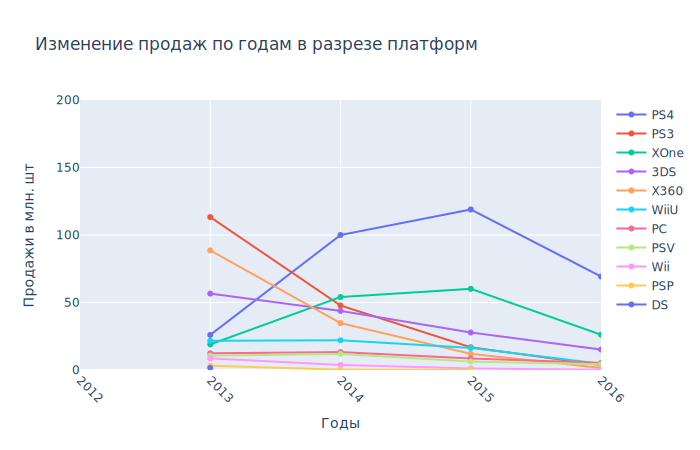

In [40]:
sales_per_year_act = (df_act.pivot_table(index='platform', columns = 'year_of_release', 
                                values='total_sales', aggfunc='sum', margins=True)
                  .reset_index().sort_values(by='All', ascending=False)) #сделали сводную по годам и сразу отсортировали по суммарным продажам
display(sales_per_year_act)

# выведем график по продажам по платформам с наибольшими суммарными продажами
years = sales_per_year_act.columns[1:len(sales_per_year.columns)-1] # определяем шкалу X

# здесь я заменил топ на вывод всех платформ
top = sales_per_year_act['platform'].count() # определяем, какое количество считать топом

fig = go.Figure() # создаем оболочку фигуры
# определим по какой столбец выводить данные на график, последний столбец Общий, поэтому его не учитываем
col_count = len(sales_per_year.columns) - 1 

for i in range(1, top): # цикл от 1 строки до конца топа, строка с общими данными не включена
    values = sales_per_year_act.iloc[i, 1:col_count] # значения для линии
    line_name = sales_per_year_act.iloc[i, 0]
    fig.add_trace(go.Scatter(x=years, y=values, name=line_name))

fig.update_layout(title='Изменение продаж по годам в разрезе платформ',
                   xaxis_title='Годы',
                   yaxis_title='Продажи в млн. шт',
                 xaxis = dict(tickmode = 'linear',tick0 = 0, dtick = 1, tickangle=45),
                  xaxis_range=[2012, 2016],
                  yaxis_range=[0, 200]
                 )
fig.show('svg')

**Теперь данные стали более укрупнены и позволяют определить интересные прибыльные платформы. Наиболее привлекательными платформами являются PS4, XOne, 3DS, WiiU, PC, т.к. они либо вышли на свое плато, либо только недавно пересекли пиковую точку и в будущем периоде точно будут популярны.**

<a id='3.4'></a>
#### 3.4 Анализ диаграмм размаха для продаж в разрезе платформ

При сравнении данных, представленных ранее мы определили топ платформ - **PS4, XOne, 3DS, WiiU, PC.** Выведем диаграммы размаха по каждой из платформ.

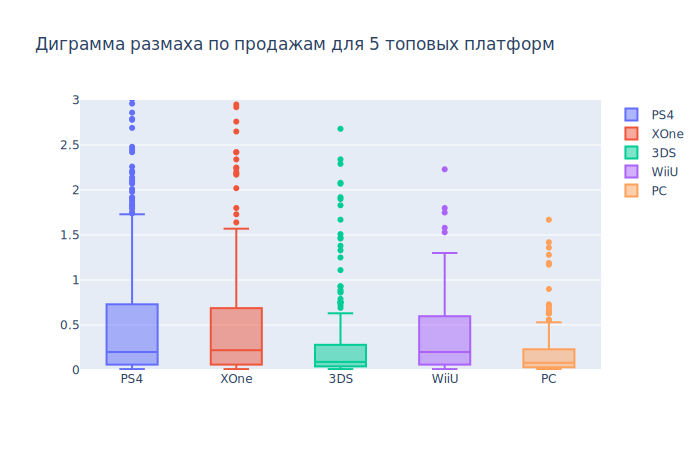

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.04,0.09,0.280,14.60
PC,189.0,0.208624,0.352304,0.01,0.03,0.08,0.230,3.05
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.730,14.63
WiiU,115.0,0.562000,1.038778,0.01,0.06,0.20,0.595,7.09
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.685,7.39


In [41]:
top_5_pl = ['PS4', 'XOne', '3DS', 'WiiU', 'PC'] # создадим series для хранения названий 5 топовых платформ

fig = go.Figure() # создаем оболочку фигуры

for platform in top_5_pl:
    
    fig.add_trace(go.Box(y=df_act.query('platform == @platform')['total_sales'], name=platform))

fig.update_layout(title='Диграмма размаха по продажам для 5 топовых платформ', yaxis_range=[0,3])
fig.show('svg')

df_act.query('platform in @top_5_pl').groupby('platform')['total_sales'].describe() # выведем описание данных

Для диаграмм размаха каждой из платформ характерен сильный сдвиг медианы к первому квартилю, что говорит о  наличии длинного хвоста больших значений (выбросов), и подтверждается большой разницей (в 3-4 раза) между медианой и средним. В виду большого количества выбросов среднее сильно превышает медиану. По всей видимости на каждой из платформ имеются топовые игры, которые продаются чаще всего, но при этом большинство игр продается в количестве, находящимся до границы правого уса.

Из описательных характеристик можно увидеть, что **мы получили практически одиннаковые ящики для PS4, WiiU и XOne, что говорит о их прямом конкурировании на рынке. Причем больше всего игр выпустилось на PS4, чуть меньше на XOne и меньше всех WiiU.**

**Также примечательно, что несмотря на то, что на PC выпустилось почти такое же количество игр как и на WiiU, объем продаж на них значительно меньше, практически все описательные характеристики в 2 раза меньше, чем для WiiU, что говорит о любви геймеров больше играть на приставках, нежели чем на ПК.**

**Отдельное место занимает портативная платформа 3DS, для которой выпускается значительно бОльшее количество игр, нежели на других платформах, но при этом объемы продаж для этих игр находятся на уровне ПК.**

<a id='3.5'></a>
#### 3.5 Анализ влияния отзывов критиков и пользователей на продажи видеоигр

Влияние отзывов на продажи проанализируем с помощью диаграммы рассеяния и определения коэффициентов корреляции. В качестве примера для нашего анализа возьмем платформу **PS4.**

Влияние оценок на продажи для платформы ['PS4']

              total_sales  critic_score  user_score
total_sales      1.000000      0.406568   -0.031957
critic_score     0.406568      1.000000    0.557654
user_score      -0.031957      0.557654    1.000000


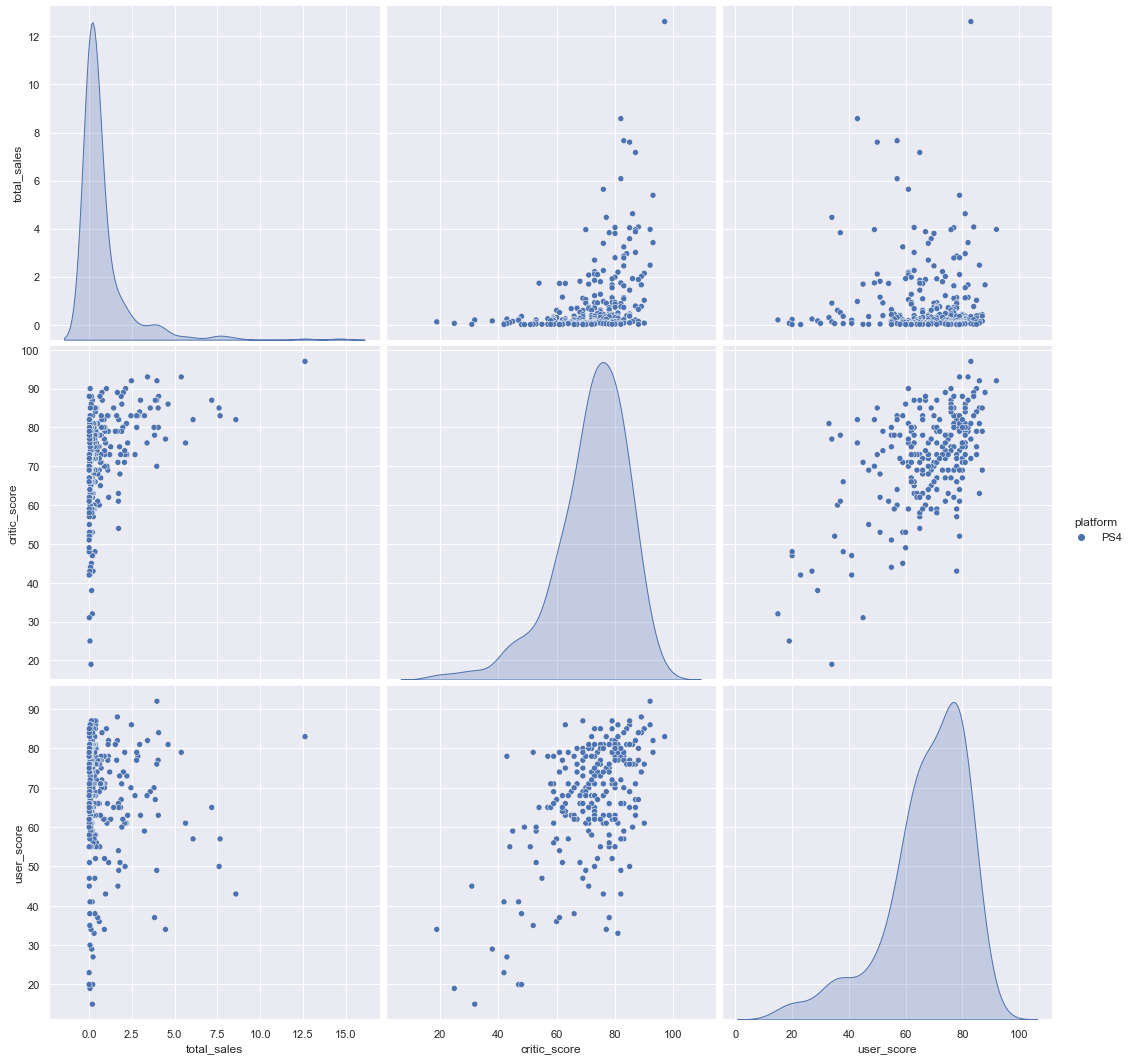

In [45]:
def corr_analysis (df, pl):
    
    df_platform = df[df['platform'].isin(pl)]
    cols = ['total_sales', 'critic_score', 'user_score', 'platform']
    sns_plot = sns.pairplot(df_platform[cols], height=5, hue='platform')
    print('Влияние оценок на продажи для платформы', pl)
    print()
    print(df_platform[cols].corr())
    
corr_analysis(df_act, ['PS4'])

Согласно коэффициентов корреляции оценка пользователей не влияет на продажи видеоигр (*k* ≈ **0**). Оценка критиков влияет чуть больше (*k* ≈ **0.55**), хотя связь можно класифицировать как слабую. То же самое подтверждается диаграммами рассеяния, на которых невозможно провести какую-либо линию тренда для связей оценок с продажами. Тем не менее, фиксируется определенный подъем продаж в заисимости от возрастания оценок, причем для оценок критиков данный подъем выражен более четко, что объясняет более высокий коэффициент корреляции.

Достаточно хорошо прослеживается связь оценок пользователей и оценок критиков, фиксируется прямая умеренная связь, которая подтверждается графиком и коэффициентом корреляции *k* ≈ 0.55. Также мы видим, что гистограммы для обеих оценок скошены влево, что говорит о большом хвосте оценок, стремящихся к нулю. При этом для оценок критиков скошенность проявляется менее явно, что говорит о более либеральном отношении критиков к низкой оценке видеоигр.

Посмотрим повторяются ли данные выводы для других платформ. Для примера возьмем **прямых конкурентов PS4 (XOne и WiiU) и проведем совместный анализ**.

Влияние оценок на продажи для платформы ['XOne', 'WiiU']

              total_sales  critic_score  user_score
total_sales      1.000000      0.403772    0.082294
critic_score     0.403772      1.000000    0.514960
user_score       0.082294      0.514960    1.000000


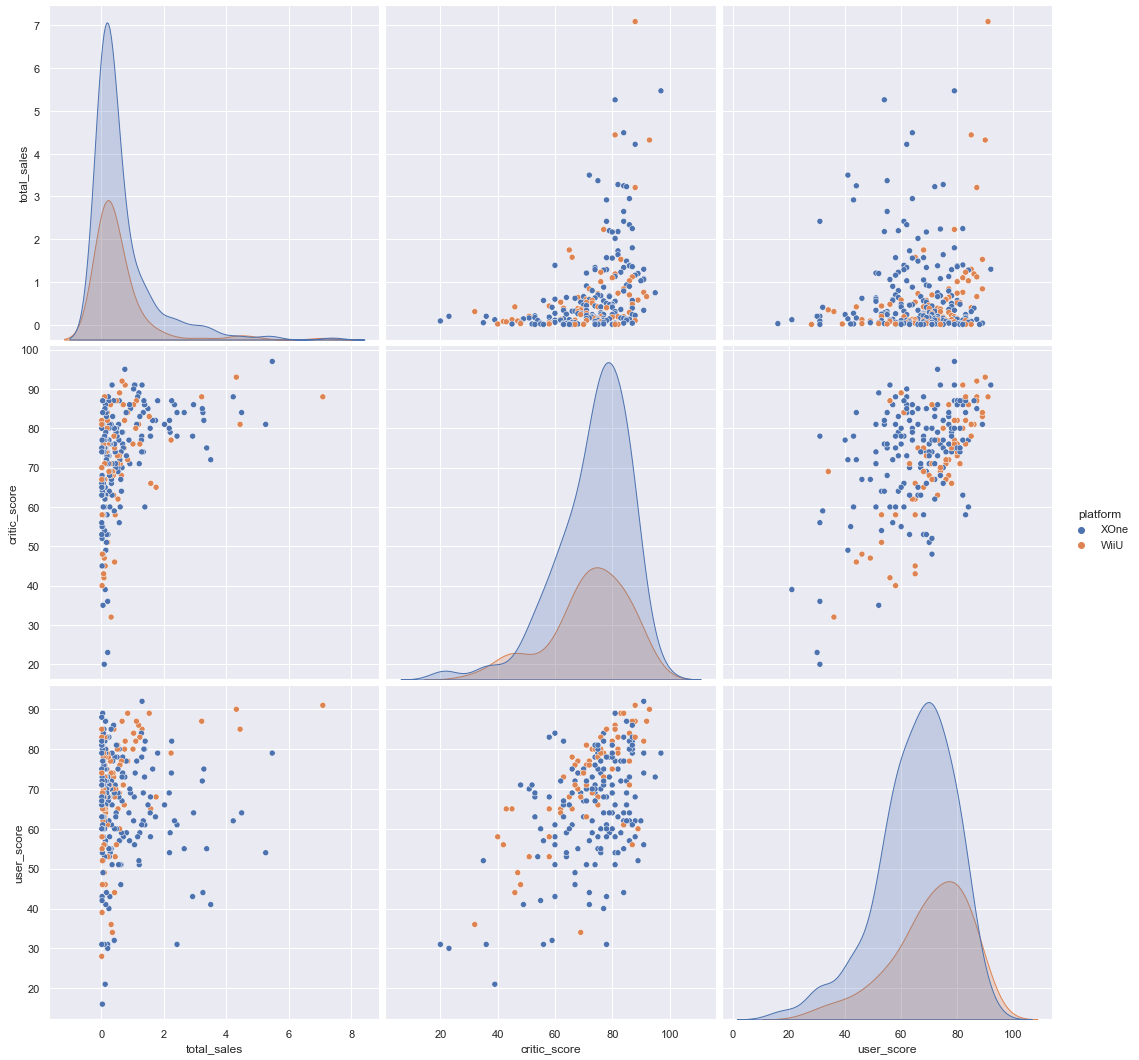

In [46]:
corr_analysis(df_act, ['XOne', 'WiiU'])

Данные для рассмотренных платформ распределены аналогично PS4: связь оценки пользователей и продаж практически отсутствует, оценки критиков и продаж - присутствует, но слабая; имеется увмеренная связь между оценками критиков и пользователей.

<a id='3.6'></a>
#### 3.6 Анализ распределения игр по жанрам

В данном разделе посмотрим как распределены все игры по жанрам, а также какое количество продаж в каждом жанре. Для расчета продаж по жанрам сделаем сводную таблицу в разрезе каждого жанра. Чтобы сделать сводную по количеству игр в каждом жанре, требуется изначально скомпоновать повторы игр, а далее разделить их по жанрам.

In [56]:
# создадим таблицу с количеством игр в каждом жанре
genre_count = (df_act.pivot_table(index=['genre', 'name'], values='platform', aggfunc='count') # сгруппировали по жанру и имени
 .reset_index()
 .pivot_table(index='genre', values='name', aggfunc='count') # посчитали количество игр в каждом жанре
 .reset_index())
genre_count.columns = ['genre', 'count'] # зададим наименования столбцов

# создадим таблицу с объемом продаж в каждом жанре
genre_sales = (df_act.pivot_table(index='genre', values='total_sales', aggfunc='sum').reset_index())
genre_sales.columns = ['genre', 'sales']

# объединим 2 таблицы в одну
genre_distr = genre_sales.merge(genre_count, on='genre')
genre_distr = genre_distr.sort_values(by='count', ascending=False) # отсортируем по количеству вышедших игр
total_sales = genre_distr['sales'].sum()
total_count = genre_distr['count'].sum()
genre_distr['sales_percent'] = (genre_distr['sales'] / total_sales).map('{:.2%}'.format)
genre_distr['count_percent'] = (genre_distr['count'] / total_count).map('{:.2%}'.format)

genre_distr

,genre,sales,count,sales_percent,count_percent
0,Action,321.87,402,29.51%,31.83%
7,Role-Playing,145.89,207,13.38%,16.39%
1,Adventure,23.64,179,2.17%,14.17%
3,Misc,62.82,102,5.76%,8.08%
8,Shooter,232.98,76,21.36%,6.02%
10,Sports,150.65,75,13.81%,5.94%
9,Simulation,21.76,48,2.00%,3.80%
2,Fighting,35.31,47,3.24%,3.72%
11,Strategy,10.08,42,0.92%,3.33%
4,Platform,42.63,37,3.91%,2.93%


In [59]:
print('Коэффициент корреляции между количеством игр и объемом продаж составил:', 
     genre_distr['count'].corr(genre_distr['sales']))

Коэффициент корреляции между количеством игр и объемом продаж составил: 0.7369051822655365


По количеству вышедших игр лидируют следующие жанры: Action, Role_Playing, Adventure, Misc, Shooter.

По объему продаж лидируют игры следующих жанров: Action, Shooter, Role-Playing, Sports, Misc.

Хуже всего продаются стратегии, пазлы и приключения.

Из графика и вышесказанного можно заключить, что лидером по продажам являются игры жанра Action (доля рынка = 29,51 %). К экшен-играм может быть отнесена любая игра, где победа над противником обеспечивается благодаря физическому превосходству, например, лучшим прицеливанием или меньшем временем реакции. Под это определение можно отнести очень большое количество игр, поэтому они являются наиболее издаваемыми, и больше всего продаются. 

По всей видимости люди не сильно любят разгадывать загадки и строить логические цепочки, играя в видеоигры, т.к. стратегии и пазлы меньше всего выпускаются и хуже всего продаются.

Особо выделяются стрелялки и спортивные игры, хоть доля в их количестве не превышает ряд других жанров, они занимают значительный объем рынка.

Получен, достаточно высокий коэффициент корреляции, который говорит, что в основном % количества игр соответствует % их продаж по жанрам, за исключением особенностей, описанных выше.

### Вывод по проведенному анализу данных<a class="tocSkip">

<div style="border:solid green 2px; padding: 10px">
<b>По итогу проведенного анализа были выявлены следующие особенности:</b>
    
1.	С 1995 года пошел значительный рост в игровой индустрии.
2.	После 2009 года произошел спад по количеству выпускаемых игр в год, который вышел на плато в 2013 году, на момент анализа в среднем выпускается 278 игр в год.
3.	С течением времени игровые платформы устаревают и на смену им приходят новые, - средний срок жизни одной платформы составляет 7-9 лет. После своего появления продажи по каждой новой платформе стремительно растут, доходят до пика, и также стремительно падают, потому что появляется другая более современная платформа. **В связи с делением жизненного срока примерно поровну, актуальный период принят равным 3 года.**
4.	Анализ диаграмм размаха показал, что за последние годы **наиболее перспективными являются платформы PS4, XOne, WiiU, PC, 3DS**. На каждой из представленных платформ имеются «топовые» игры, которые бьют рекорды по продажам и создают длинный хвост для распределений. Средний объем продаж находится на уровне 200 тысяч копий.
5.	Отзывы пользователей практически не влияют на продажи игр (коэффициент корреляции в пределах от 0 до 0.1), отзывы критиков имеют слабое влияние (коэффициент корреляции около 0.4).
6.	По объему продаж лидируют игры следующих жанров: Action, Sports, Shooter, Misc, Role-Playing. Эти 5 жанров занимают практически **80** % рынка.
7.	Хуже всего продаются стратегии, пазлы и приключения.
8.	Взаимосвязь количества выпускаемых игр в жанре с объемом их продаж выше средней (коэффициент корреляции приблизительно равен **0.74**), это обусловлено особо высоким интересом геймеров к стрелялкам и спортивным играм, а также особо низким интересом к играм в жанрах приключения, пазлы и стратегии.
</div>

<a id='4'></a>
### 4 Описание портрета пользователя каждого региона

<a id='4.1'></a>
#### 4.1 Определение самых популярных платформ в разрезе регионов

Определение самых популярных платформ выполним с помощью анализа объемов продаж в долях. Для этого создадим сводную таблицу с продажами в каждом регионе по каждой платформе и добавим в нее доли. Для добавления долей будем считать общие продажи по региону и далее вычислять долю по каждой платформе от посчитанного общего.

In [60]:
# создадим сводную таблицу со всеми регионами и платформами
def sales (df, estimate):
    sales_part = df.groupby(estimate)[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].sum()
    sales_part.reset_index(drop=False, inplace=True)
    
    # заменим продажи на доли
    for col in sales_part.columns[1:]:
        total = sales_part[col].sum()
        sales_part[col] = (sales_part[col] / total).map('{:.2f}'.format)
    return sales_part

sales_platform = sales(df_act, 'platform') # создадим таблицу в разрезе по платформам и регионам
sales_platform

,platform,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,3DS,0.09,0.08,0.48,0.05,0.13
1,DS,0.00,0.00,0.00,0.00,0.00
2,PC,0.03,0.06,0.00,0.02,0.04
3,PS3,0.15,0.17,0.17,0.22,0.17
4,PS4,0.25,0.36,0.11,0.40,0.29
5,PSP,0.00,0.00,0.02,0.00,0.00
6,PSV,0.01,0.02,0.13,0.03,0.03
7,Wii,0.01,0.02,0.00,0.01,0.01
8,WiiU,0.07,0.05,0.08,0.04,0.06
9,X360,0.19,0.11,0.00,0.10,0.13


Получили таблицу с долями продаж по каждому региону. Теперь в каждом из них выделим топ-5 платформ и запишем их в чарт лучших.

In [61]:
# создадим функцию для вывода чарта топ-5 в виде датафрейма
def for_raiting (df, rait_value):
    data = [] # задаем массив для хранения данных датафрейма
    col_chart = ['name', '1', '2', '3', '4', '5'] # задаем наименования столбцов
    
    for col in df.columns[1:]: # заполняем data данными по лучшим 5 значениям
        top_5_in_region = [col] + (df.sort_values(by=col, ascending=False)[rait_value].head().to_list())
        data.append(top_5_in_region)
    
    chart = pd.DataFrame(data = data, columns = col_chart) # создаем и выводим датафрейм
    return chart

for_raiting(sales_platform, 'platform') # выведем топ-5 для платформ

,name,1,2,3,4,5
0,na_sales,PS4,XOne,X360,PS3,3DS
1,eu_sales,PS4,PS3,XOne,X360,3DS
2,jp_sales,3DS,PS3,PSV,PS4,WiiU
3,other_sales,PS4,PS3,XOne,X360,3DS
4,total_sales,PS4,PS3,XOne,3DS,X360


Получили достаточно интересный чарт 5 топовых платформ для каждого региона. **Несмотря на то, что в выбранном актуальном периоде уже более популярны стали новые платформы (PS4 и XOne), в Северно Америке и Европе все еще продолжают пользоваться их старшими братьями. В Европе несомненный лидер это компания Sony (забрала 51 % рынка). В Америке, несмотря на лидерство PS4, рынок между Sony и Microsoft разделился поровну - по 40 %. На 5 месте в обоих регионах находится портативная платформа 3DS.**


Японцы разительно отличаются в своих предпочтениях в игровых приставках. **2** из 5 топовых платформ - это карманные консоли, и естественно на **первом месте** - Японского производства. Игры для **X360 и XOne не продаются в Японии от слова "совсем"**, что говорит о плохом внедрении игровой продукции Microsoft в данном регионе. **Несмотря на то, что WiiU, являющийся конкурентом PS4 и XOne, имеет японские корни, она не смогла опередить по объемам продаж даже PS3. Видимо, хоть японцы и любят карманные приставки, в настольных они тоже знают толк.** 

<a id='4.2'></a>
#### 4.2 Определение самых популярных жанров в разрезе регионов

Проведем определение самых популярных жанров аналогично определению самых популярных платформ с импользованием разработанных функций.

In [62]:
sales_genre = sales(df_act, 'genre') # создадим таблицу в разрезе по жанрам и регионам
sales_genre

,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,Action,0.29,0.30,0.29,0.31,0.30
1,Adventure,0.02,0.02,0.04,0.02,0.02
2,Fighting,0.04,0.02,0.05,0.03,0.03
3,Misc,0.06,0.05,0.07,0.05,0.06
4,Platform,0.04,0.04,0.03,0.03,0.04
5,Puzzle,0.00,0.00,0.01,0.00,0.00
6,Racing,0.03,0.05,0.02,0.04,0.04
7,Role-Playing,0.11,0.09,0.36,0.10,0.13
8,Shooter,0.25,0.22,0.05,0.24,0.21
9,Simulation,0.01,0.03,0.03,0.01,0.02


In [63]:
for_raiting(sales_genre, 'genre') # выведем топ-5 для жанров

,name,1,2,3,4,5
0,na_sales,Action,Shooter,Sports,Role-Playing,Misc
1,eu_sales,Action,Shooter,Sports,Role-Playing,Misc
2,jp_sales,Role-Playing,Action,Misc,Fighting,Shooter
3,other_sales,Action,Shooter,Sports,Role-Playing,Misc
4,total_sales,Action,Shooter,Sports,Role-Playing,Misc


Продажи игр в Европе и Америке одинаковы и повторяют столбчатую диаграмму, отраженную выше.

Особо выделяется Япония, на 1-е место для нее вышли игры жанра "Ролевые" (36 % японского рынка). Это объясняется несколько другими интересами игроков в Японии, нежели в остальных странах. Любовь японцев к ролевым играм привела даже к появлению нового игрового жанра "Ролевая японская игра" (JRPG), к таким играм относятся, к примеру, все игры серии Final Fantasy и Pokemon. 

<a id='4.3'></a>
#### 4.3 Определение влияния на продажи рейтинга ESRB в разрезе регионов

Проведем аналогичную аналитику и для продаж в разрезе рейтингов.

In [64]:
sales_esrb = sales(df_act, 'age_rating') # создадим таблицу в разрезе по жанрам и регионам
sales_esrb

,age_rating,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,10+,0.12,0.11,0.04,0.10,0.11
1,13+,0.11,0.11,0.15,0.12,0.12
2,18+,0.38,0.37,0.10,0.39,0.34
3,6+,0.18,0.21,0.11,0.19,0.18
4,не определен,0.20,0.20,0.60,0.20,0.25


In [65]:
for_raiting(sales_esrb, 'age_rating') # выведем топ-5 для рейтинга

,name,1,2,3,4,5
0,na_sales,18+,не определен,6+,10+,13+
1,eu_sales,18+,6+,не определен,10+,13+
2,jp_sales,не определен,13+,6+,18+,10+
3,other_sales,18+,не определен,6+,13+,10+
4,total_sales,18+,не определен,6+,13+,10+


Если отбросить внияние незаполненного рейтинга, то увидим, что количество продаж в разрезе рейтинга в Европе и Америке одинаковое. **В Японии игры 18+ менее обожаемы, и спустились до 3-го места, но при этом и больший % игр в Японии не имеет возрастного рейтинга. Такое большое отсутствие возрастного рейтинга скорей всего обусловлено тем, что эти игры выпущены на территории Японии и он для них просто не задавался.**

### Составление портрета пользователя в каждом регионе<a class="tocSkip">

<div style="border:solid green 2px; padding: 10px">
<b>По итогу определения топовых характеристик для каждого региона можно сделать следующие описания:</b>
    
**Северная Америка**
    
Геймеры в Америке отдают предпочтение настольным приставкам, рынок между гигантами индустрии Sony и Microsoft разделился поровну - по 40 %. Несмотря на наличие новых версий приставок, старые все еще в ходу.
    
Больше всего в Америке любят играть в экшены, спортивные игры и стрелялки, также в топ-5 входят разнообразные игры и ролевые.

Распределение объемов продаж по рейтингу такое же как в среднем «по больнице»: 1 место – игры от 18 лет, 2-е – от 6 лет, 3-е – от 10 лет, и 4-е – от 13 лет.
    
**Европа**
    
В Европе почти такая же ситуация по приставкам, первые три места разделили между собой PS4, PS3, XOne. На четвертом месте – X360, и в конце топа – карманная 3DS.
    
Любовь к жанрам в Европе проявляется также как в Америке.

Распределение объемов продаж по рейтингу в Европе аналогично распределению в Америке.
    
**Япония**
    
Ситуация по платформам разительно отличается в данном регионе. 2 из 5 в топ-5 – это карманные консоли (3DS, PSV), значит японцы предпочитают не быть прикованными к дивану и играть где им хочется. Оставшиеся платформы – это PS3, PS4 и WiiU. Продукция Microsoft в Японии в актуальном периоде не представлена.
    
36 % рынка Японии занимают ролевые игры, что обусловлено особой любовью этого региона к данному жанру, который даже носит название Японская ролевая игра. В остальном японцы также любят экшены, спортивные игры, разнообразные и платформенные.
    
В Японии очень много игр, которым не присвоен рейтинг, а также игры 18+ смещены у них на 3 место топа.
</div>

<a id='5'></a>
### 5 Проверка статистических гипотез

<a id='5.1'></a>
#### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Данная гипотиза относится к следующему формату: средние двух генеральных совокупностей равны между собой.

Сформулируем нулевую гипотезу. H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
<br>Сформулируем альтернативную гипотезу. H1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Для проверки гипотезы используем T-тест (или тест Стьюдента), который решает задачу доказательства наличия различий средних значений количественной переменной в случае, когда имеются лишь две сравниваемые группы. 

Для проверки правдоподобия статистической гипотезы используем критерий значимости.

Уровень значимости примем равным 5 %.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind (array1, array2, equal_var), где array1 и array2 - наши выборки.

Параметр equal_var задает равные ли диспперсии выборок, поэтому для корректного расчета нам необходимо сравнить значения дисперсий каждой выборки.

In [66]:
# сформируем выборки по оценкам пользователей для платформ
xone_sample = df_act[df_act['platform'] == 'XOne']['user_score'].dropna() # создадим series для платформы xone
pc_sample = df_act[df_act['platform'] == 'PC']['user_score'].dropna() # создадим series для платформы PC

# проверим дисперсии каждой из выборок для принятия решения какое значение присвоить параметру equal_var
variance_estimate_xone = np.var(xone_sample, ddof=1) # дисперсия для xone
variance_estimate_pc = np.var(pc_sample, ddof=1) # дисперсия для PC

print('Дисперсия для выборки для платформы XBox One равна', variance_estimate_xone)
print('Дисперсия для выборки для платформы PC равна', variance_estimate_pc)

Дисперсия для выборки для платформы XBox One равна 190.69968429360694
Дисперсия для выборки для платформы PC равна 303.5892752408881


Видим отличие в дисперсиях выборок, поэтому примем параметр equal_var равным False и проверим нулевую гипотезу.

In [67]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    xone_sample, 
    pc_sample,
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.1475959401343053
Не получилось отвергнуть нулевую гипотезу


p-value **практически в 3 раза выше установленного уровня значимости, что говорит о том, что нулевую гипотезу отвергнуть нельзя, и следовательно нельзя сказать, что средние пользовательские рейтинги платформ Xbox One и PC различаются**.

<a id='5.2'></a>
#### 5.2 Средние пользовательские рейтинги жанров Action и Sports разные

Проверку гипотезы выполним аналогично предыдущему пункту.

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые
<br>H1: Средние пользовательские рейтинги жанров Action и Sports разные

In [68]:
# сформируем выборки по оценкам пользователей для жанров
action_sample = df_act[df_act['genre'] == 'Action']['user_score'].dropna() # создадим series для жанра Action
sports_sample = df_act[df_act['genre'] == 'Sports']['user_score'].dropna() # создадим series для жанра Sports

# проверим дисперсии каждой из выборок для принятия решения какое значение присвоить параметру equal_var
variance_estimate_action = np.var(action_sample, ddof=1) # дисперсия для action
variance_estimate_sports = np.var(sports_sample, ddof=1) # дисперсия для sports

print('Дисперсия для выборки для жанра Action равна', variance_estimate_action)
print('Дисперсия для выборки для жанра Sports равна', variance_estimate_sports)

Дисперсия для выборки для жанра Action равна 176.93609042482706
Дисперсия для выборки для жанра Sports равна 318.0612814465409


Видим отличие в дисперсиях выборок, поэтому примем параметр equal_var равным False и проверим нулевую гипотезу.

In [69]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    action_sample, 
    sports_sample,
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.4460039700704734e-20
Отвергаем нулевую гипотезу


p-value критично мало, нулевая гипотеза отвергнута, следовательно принимаем альтернативную гипотезу: Средние пользовательские рейтинги жанров Action и Sports разные.

### Вывод по результатам анализа <a class="tocSkip">

<div style="border:solid green 2px; padding: 10px">
В результате проверки гипотиз было выявлено следующее:

- Средние пользовательские рейтинги платформ Xbox One и PC **не** различаются;
- Средние пользовательские рейтинги жанров Action и Sports разные.
</div>

<a id='final'></a>
### Общий вывод

<div style="border:solid green 2px; padding: 10px">

Основной задачей, поставленной заказчиком, являлось выявить определяющие успешность игры закономерности, позволяющие прогнозировать продажи на будущий период по имеющимся данным.
<br>    
Для решения поставленной задачи были выполнены изучение и предобработка данных, после чего мы перешли к анализу. В результате анализа мы установили, что бум выхода видеоигр пришелся на период с 2007 по 2010 год, далее игры стали издаваться примерно в 2 раза реже, что говорит о более серьезной проработке качества игр и повышении их цены.
<br> 
Дальнейший анализ продаж в разрезе игровых платформ показал, что жизненный срок одной платформы составляет около **7-10** лет, значит при осуществлении прогноза продаж, допустим на будущие **3 года**, интернет-магазину «Стримчик» следует делать упор на те платформы, которые вышли не ранее, чем **3 года** назад.
<br>    
Также диаграммы размаха для самых востребованных платформ в актуальном периоде равным **3 года** показали, что при планировании будущего периода **заказчику стоит делать упор на недавно вышедшие платформы PS4 и XOne**.
<br>    
Матрица корреляции и диаграммы рассеивания показали, что заказчику нет необходимости при прогнозировании продаж сильно присматриваться к отзывам пользователей (они сильно разрознены и коэффициент корреляции находится в районе 0). Можно присмотреться к отзывам критиков, но связь продаж и этих отзывов слабая (коэффициент корреляции около 0,4), поэтому сильный упор на отзывы критиков при принятии решения по закупке определенных игр также делать не требуется.
<br>    
Если интернет-магазин «Стримчик» ведет свою деятельность по всему земному шару, то ему нужно внимательно отнестись к разнице интересов пользователей в Америке, Европе и Японии.
<br>    
Анализ распределения игр по платформам показал, что в топ-5 в Америке и Европе попали почти одни и те же платформы, причем в основном это настольные приставки производства Microsoft и Sony, поэтому именно на них в этих регионах и надо делать упор. В Японии 2 из 5 топовых приставок являются карманными, поэтому для японских геймеров заказчику лучше предлагать игры для карманных приставок.
<br>    
Американские и Европейские геймеры любят примерно одни и те же жанры, в топ-5 вошли экшены, спортиные игры, шутеры, разнообразные, ролевые или гонки. В Японии же топ-5 возглавляют ролевые игры. Поэтому при планировании продаж для Европы и Америки заказчик может выстраивать одинаковую рекламную и закупочную кампании, а для Японии делать больший упор на ролевые игры.
<br>    
Продажи в зависимости от возрастной категории практически не зависят от региона и распределяются почти одинаково.
Также была проведена проверка гипотез, которая показала, что **средние пользовательские рейтинги платформ Xbox One и PC нельзя назвать разными, а средние пользовательские рейтинги жанров Action и Sports различаются**.
<br>    
Проект сделан таким образом, чтобы при подгрузке обновленного датасета в том же формате (например в 2021 году), можно было путем замены нескольких аргументов быстро спрогнозировать продажи на следующий период.</div>